# Librerias y datos

In [3]:
import pandas as pd
import numpy as np

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

import pickle

Los datos fueron extraidos de https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset?select=Fake.csv

Dos archicos:
- Fake.csv 
-True.csv

In [5]:
df_f= pd.read_csv('data/Fake.csv')
df_t= pd.read_csv('data/True.csv')

# Exploración de datos

In [6]:
df_f

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [7]:
df_t

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


## Transformacion

Agregamos a cada DF una columna con la etiqueta "FAKE" o "TRUE" según sea el dataset

In [8]:
df_t['label'] = 'TRUE'
df_f['label'] = 'FAKE'

In [9]:
# Pegamos df_f a continuación de df_t
df = df_t.append(df_f)

In [10]:
df.shape

(44898, 5)

In [11]:
# Borramos los DF que no vamos a seguir usando
del df_t, df_f

In [12]:
df.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [13]:
df.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",TRUE
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",TRUE
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",TRUE
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",TRUE
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",TRUE


In [14]:
df = df[['title','text','label']]

In [15]:
df['total']=df['title']+' '+df['text']
df.to_csv('base_limpia.csv', index = False)

# WordCloud 

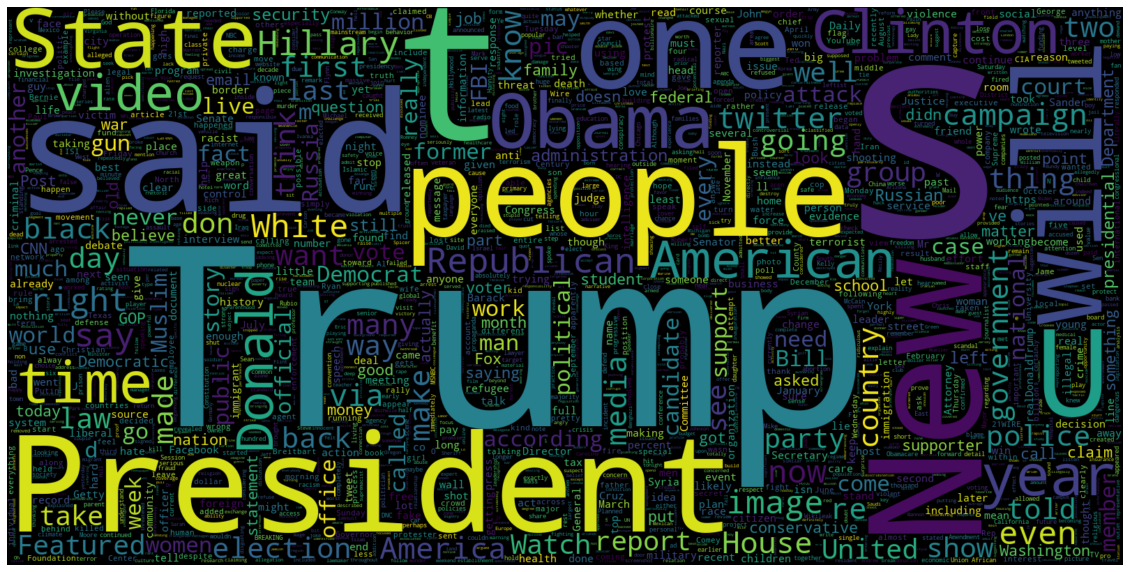

In [13]:
plt.figure(figsize=(20, 20))

wordcloud = WordCloud(max_words=2000,
                      width=1600,
                      height=800,
                      stopwords=STOPWORDS,
                      random_state= 1,
                      collocations=False).generate(" ".join(
                          df[df.label == "FAKE"].total))
plt.axis("off")
plt.margins(x=0, y=0)

plt.imshow(wordcloud, interpolation='bilinear')

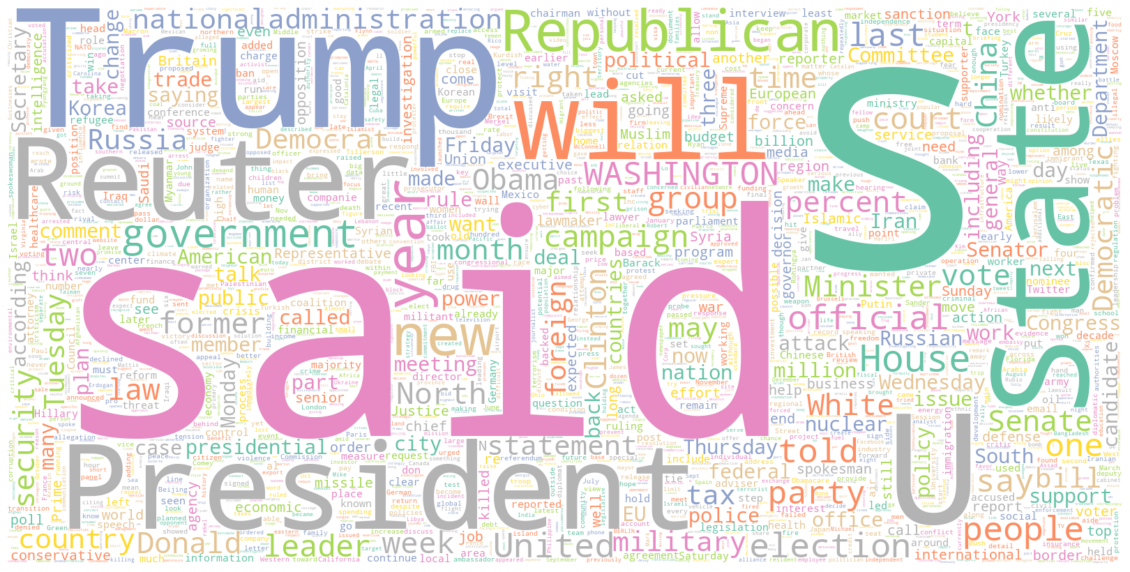

In [56]:
plt.figure(figsize=(20, 20))

wordcloud = WordCloud(max_words=2000,
                      width=1600,
                      height=800,
                      stopwords=STOPWORDS,
                      background_color='white',
                      colormap='Set2',
                      random_state= 1,
                      collocations=False).generate(" ".join(
                          df[df.label == "TRUE"].total))
plt.axis("off")
plt.margins(x=0, y=0)

plt.imshow(wordcloud, interpolation='bilinear')

# Train Test Split 

In [4]:
df= pd.read_csv('base_limpia.csv')
df_x=df['total']
df_y=df['label']

In [5]:
X_train1, X_test1, y_train, y_test=train_test_split(df_x,df_y, test_size=0.2, random_state=1)

In [6]:
tv1=TfidfVectorizer(min_df=1,stop_words='english') #min_df=1, ignorar los términos que aparecen en menos de 1 documento. 

In [7]:
X_train=tv1.fit_transform(X_train1)

In [8]:
X_test=tv1.transform(X_test1)

In [28]:
pickle.dump(tv1,open ('vectorizer_en.pickle','wb')) # Guardamos el pickle para levantarlo en web app

# SVM

In [42]:
from sklearn import svm
support_vector_machine=svm.LinearSVC()
support_vector_machine.fit(X_train,y_train)

LinearSVC()

In [43]:
pickle.dump(support_vector_machine, open('model_svm_en.pickle','wb')) # Guardamos el pickle para levantarlo en web app

In [44]:
pred2=support_vector_machine.predict(X_test)

In [45]:
from sklearn.metrics import accuracy_score as ac
ac(pred2,y_test)

0.9957683741648107

In [14]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_df=0.80)),
    ('clf',svm.SVC(kernel='linear'))])

In [17]:
pipeline.fit(X_train, y_train)

In [18]:
result = pipeline.predict([
    "One of the challenges being faced worldwide is the rate of infection of health professionals while treating COVID-19 patients.  2016 statistics show the following picture of Rwanda’s health sector: 1/50,505 ground ambulance / population Ratio; 1/10,055 Doctor/population ratio; 1/1,094 Nurse/population ratio; 1/10,500 Laboratory technicians /population ratio. Although Rwanda is on track to meeting most of the required quota, the country cannot afford the set back that a pandemic like COVID-19 among health professionals would cause. To minimize contact time with confirmed cases and therefore reducing the risk of contamination of health professionals in COVID-19 treatment centres, robots were deployed. At Gatenga and Kanyinya treatment centres in Kigali City, visits by medical staff to patients went from 3-4 to 2 per day since May 2020. The 5 human-size robots are programmed to perform temperature screening, take readings of vitals, deliver video messages and detect people not wearing masks then instruct them to wear masks properly. On Tuesday, May 19 at the Kanyinya COVID-19 Treatment Centre, the 5 robots were launched by the Ministry of Health. Named in Kinyarwanda, Akazuba, Ikirezi, Mwiza, Ngabo, and Urumuri are made by Zora Bots, a Belgian company specialised in robotics. They were acquired through a partnership between the UNDP Rwanda Accelerator Lab (AccLab) and the Ministry of ICT and Innovation.  Each robot costs about $30,000. Urumuri is currently deployed at the Kigali International Airport with the capacity to screen 50 to 150 people per minute and report abnormalities to officers on duty. As Rwanda is reopening Kigali International Airport for commercial international flights from 1st of August, Urumuri will allow to speed up mass screenings of fever for passengers as they land. Smart anti-epidemic robots have been used in Asia to help flatten the COVID-19 curve. The pandemic has proven to be a crosscutting challenge affecting Rwanda in all sectors (Health, Economy, Education, Agriculture, …). It therefore requires different sometimes innovative solutions with available resources like robots."
])
print(result)

# KNN

In [32]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=4) 
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [33]:
pickle.dump(knn, open('model_knn_en.pickle','wb')) # Guardamos el pickle para levantarlo en web app

In [34]:
pred1=knn.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score as ac
ac(pred1,y_test)

0.886859688195991

In [36]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_df=0.80)),
    ('clf',KNeighborsClassifier(n_neighbors=4))])

In [37]:
pipeline.fit(X_train, y_train)

AttributeError: lower not found

In [ ]:
result=pipeline.predict(["One of the challenges being faced worldwide is the rate of infection of health professionals while treating COVID-19 patients.  2016 statistics show the following picture of Rwanda’s health sector: 1/50,505 ground ambulance / population Ratio; 1/10,055 Doctor/population ratio; 1/1,094 Nurse/population ratio; 1/10,500 Laboratory technicians /population ratio. Although Rwanda is on track to meeting most of the required quota, the country cannot afford the set back that a pandemic like COVID-19 among health professionals would cause. To minimize contact time with confirmed cases and therefore reducing the risk of contamination of health professionals in COVID-19 treatment centres, robots were deployed. At Gatenga and Kanyinya treatment centres in Kigali City, visits by medical staff to patients went from 3-4 to 2 per day since May 2020. The 5 human-size robots are programmed to perform temperature screening, take readings of vitals, deliver video messages and detect people not wearing masks then instruct them to wear masks properly. On Tuesday, May 19 at the Kanyinya COVID-19 Treatment Centre, the 5 robots were launched by the Ministry of Health. Named in Kinyarwanda, Akazuba, Ikirezi, Mwiza, Ngabo, and Urumuri are made by Zora Bots, a Belgian company specialised in robotics. They were acquired through a partnership between the UNDP Rwanda Accelerator Lab (AccLab) and the Ministry of ICT and Innovation.  Each robot costs about $30,000. Urumuri is currently deployed at the Kigali International Airport with the capacity to screen 50 to 150 people per minute and report abnormalities to officers on duty. As Rwanda is reopening Kigali International Airport for commercial international flights from 1st of August, Urumuri will allow to speed up mass screenings of fever for passengers as they land. Smart anti-epidemic robots have been used in Asia to help flatten the COVID-19 curve. The pandemic has proven to be a crosscutting challenge affecting Rwanda in all sectors (Health, Economy, Education, Agriculture, …). It therefore requires different sometimes innovative solutions with available resources like robots."])
print(result)

# RANDOM FOREST CLASSIFIER

In [38]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [39]:
pickle.dump(rf, open('model_rfc_en.pickle','wb')) # Guardamos el pickle para levantarlo en web app

In [40]:
pred=rf.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score as ac
ac(pred,y_test)

0.9916481069042317

In [65]:
pipeline = Pipeline([('tfidf',
                      TfidfVectorizer(stop_words='english', max_df=0.80)),
                     ('clf', RandomForestClassifier())
                    ])

In [67]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(max_df=0.8, stop_words='english')),
                ('clf', RandomForestClassifier())])

In [68]:
result=pipeline.predict(["One of the challenges being faced worldwide is the rate of infection of health professionals while treating COVID-19 patients.  2016 statistics show the following picture of Rwanda’s health sector: 1/50,505 ground ambulance / population Ratio; 1/10,055 Doctor/population ratio; 1/1,094 Nurse/population ratio; 1/10,500 Laboratory technicians /population ratio. Although Rwanda is on track to meeting most of the required quota, the country cannot afford the set back that a pandemic like COVID-19 among health professionals would cause. To minimize contact time with confirmed cases and therefore reducing the risk of contamination of health professionals in COVID-19 treatment centres, robots were deployed. At Gatenga and Kanyinya treatment centres in Kigali City, visits by medical staff to patients went from 3-4 to 2 per day since May 2020. The 5 human-size robots are programmed to perform temperature screening, take readings of vitals, deliver video messages and detect people not wearing masks then instruct them to wear masks properly. On Tuesday, May 19 at the Kanyinya COVID-19 Treatment Centre, the 5 robots were launched by the Ministry of Health. Named in Kinyarwanda, Akazuba, Ikirezi, Mwiza, Ngabo, and Urumuri are made by Zora Bots, a Belgian company specialised in robotics. They were acquired through a partnership between the UNDP Rwanda Accelerator Lab (AccLab) and the Ministry of ICT and Innovation.  Each robot costs about $30,000. Urumuri is currently deployed at the Kigali International Airport with the capacity to screen 50 to 150 people per minute and report abnormalities to officers on duty. As Rwanda is reopening Kigali International Airport for commercial international flights from 1st of August, Urumuri will allow to speed up mass screenings of fever for passengers as they land. Smart anti-epidemic robots have been used in Asia to help flatten the COVID-19 curve. The pandemic has proven to be a crosscutting challenge affecting Rwanda in all sectors (Health, Economy, Education, Agriculture, …). It therefore requires different sometimes innovative solutions with available resources like robots."])
print(result)

['FAKE']
